In [5]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load model and tokenizer from the repository
model_name = "/data/katha_lab/pranjul/BrainGPT-7B-v0.1/"  # Replace with the actual path to the repository
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Now you can use model to generate text, etc.


ModuleNotFoundError: No module named 'transformers'

In [6]:
!pip install transformers

/bin/bash: pip: command not found


In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Assuming the model has been properly uploaded and shared on Hugging Face's model hub,
# replace "your-username/BrainGPT-7B-v0.1" with the actual model repository path.
model_name = "/data/katha_lab/pranjul/BrainGPT-7B-v0.1/"

# Load the tokenizer and the model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Now you can use the model for text generation or inference
# For example, to generate text:
input_ids = tokenizer.encode("Your prompt here", return_tensors="pt")

# Generate the output
outputs = model.generate(input_ids, max_length=512)

# Decode and print the output
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


ModuleNotFoundError: No module named 'torch.utils._pytree'

In [8]:
model

NameError: name 'model' is not defined

In [2]:
import transformers

ModuleNotFoundError: No module named 'torch.utils._pytree'

In [6]:

ver(torch)

NameError: name 'ver' is not defined

In [2]:
import torch
print(torch.__version__)

1.7.1+cu110


In [3]:
!export GROQ_API_KEY=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


In [4]:
!pip install groq

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 15.3 MB/s eta 0:00:00
  Using cached typing_extensions-4.10.0-py3-none-any.whl (33 kB)
  Using cached pydantic-2.6.4-py3-none-any.whl (394 kB)
  Using cached anyio-4.3.0-py3-none-any.whl (85 kB)
  Using cached distro-1.9.0-py3-none-any.whl (20 kB)
  Using cached httpx-0.27.0-py3-none-any.whl (75 kB)
  Using cached exceptiongroup-1.2.0-py3-none-any.whl (16 kB)
  Using cached httpcore-1.0.4-py3-none-any.whl (77 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
  Using cached pydantic_core-2.16.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached annotated_types-0.6.0-py3-none-any.whl (12 kB)
ERROR: Will not install to the user site because it will lack sys.path precedence to typing-extensions in /shared/venvs/py3.8-torch1.7.1/lib/python3.8/site-packages

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] 

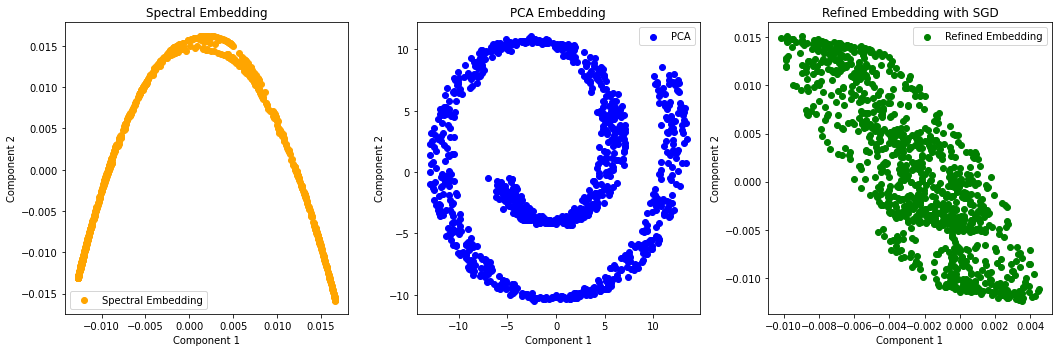

In [5]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import SpectralEmbedding
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDRegressor
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_swiss_roll(n_samples=1000, noise=0.1)

# Use Spectral Embedding for initial low-dimensional embedding
n_neighbors = 10
spectral = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=n_neighbors)
X_spectral = spectral.fit_transform(X)

# PCA for comparison (optional step for visualizing the difference)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Use a simple linear model to refine the embedding (as a substitute for the neural network)
# Setup the SGDRegressor, which will be used to refine the initial spectral embedding
regressor_x = SGDRegressor(max_iter=1000, tol=1e-3)
regressor_y = SGDRegressor(max_iter=1000, tol=1e-3)

# Train the regressors on the original high-dimensional data to predict the low-dimensional embedding
regressor_x.fit(X, X_spectral[:, 0])
regressor_y.fit(X, X_spectral[:, 1])

# Use the trained regressors to predict the refined low-dimensional embedding
X_embedded_sgd_x = regressor_x.predict(X)
X_embedded_sgd_y = regressor_y.predict(X)

# Visualization
plt.figure(figsize=(15, 5))

# Original Spectral Embedding
plt.subplot(1, 3, 1)
plt.scatter(X_spectral[:, 0], X_spectral[:, 1], c='orange', label='Spectral Embedding')
plt.title('Spectral Embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()

# PCA for comparison
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='PCA')
plt.title('PCA Embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()

# Refined Embedding
plt.subplot(1, 3, 3)
plt.scatter(X_embedded_sgd_x, X_embedded_sgd_y, c='green', label='Refined Embedding')
plt.title('Refined Embedding with SGD')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
X.shape

(1000, 3)

/shared/venvs/py3.8-torch1.7.1/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/shared/venvs/py3.8-torch1.7.1/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


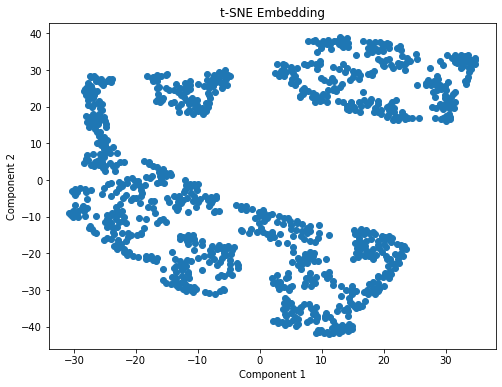

In [8]:
from sklearn.manifold import TSNE

# Initialize t-SNE with a fixed random state to get reproducible results
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data using t-SNE
X_tsne = tsne.fit_transform(X)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE Embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


/shared/venvs/py3.8-torch1.7.1/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/shared/venvs/py3.8-torch1.7.1/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


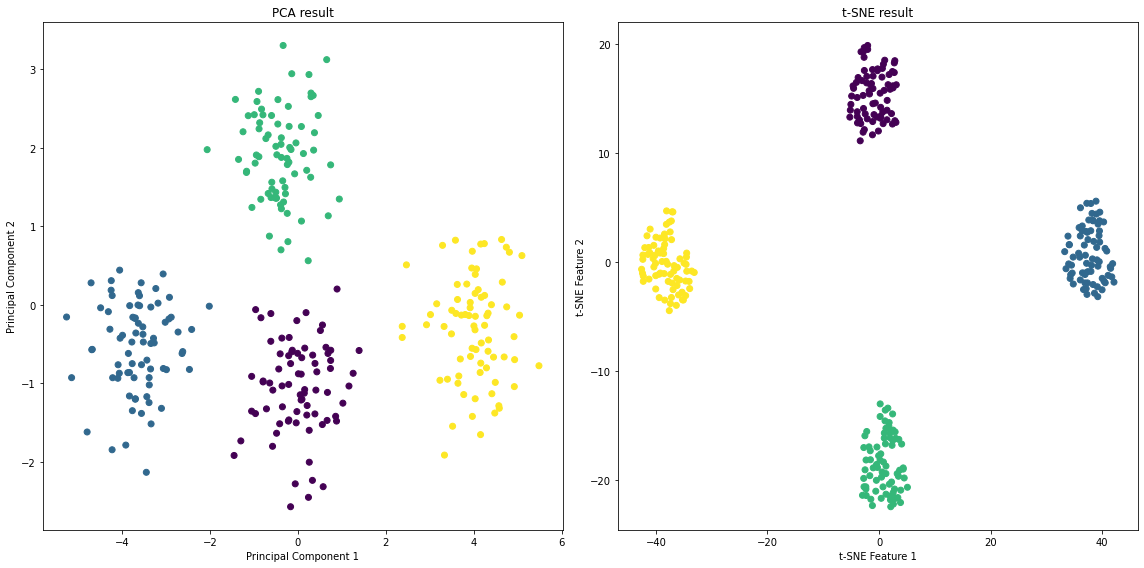

In [9]:
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Generate a sample dataset with clear clusters
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualization
plt.figure(figsize=(16, 8))

# PCA result
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('PCA result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# t-SNE result
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title('t-SNE result')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

plt.tight_layout()
plt.show()


In [11]:
X.shape

(300, 2)

In [12]:
y

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])